
## CS6220 - HW4 - Maha Alkhairy
### Clustering and evaluation 


In [1]:
"""
Implementation of different types of clustering 
"""
import random
import sklearn 
import numpy as np 
import scipy.io 
import matplotlib.pyplot as plt
from scipy.spatial import distance
from pandas import DataFrame
from sklearn.metrics import normalized_mutual_info_score, silhouette_score, calinski_harabaz_score

### Written part: 
#### for more detail look at the scanned pdf 

#### Question 1: 
a. The clusters given their points: 
* Cluster 1: {[0, 1], [1, 2], [2, 3], [3, 4]} 
* Cluster 2: {[5, 2], [6, 1], [7, 2], [6, 3]}

b. Points which are density connected: 
* [0, 1], [1, 2], [2, 3] and [3, 4] are density connected
* [5, 2], [6, 1], [7, 2] and [6, 3] are density connected 

c. Points considered as noise are: [0, 6], [0, 7] and [10, 3]



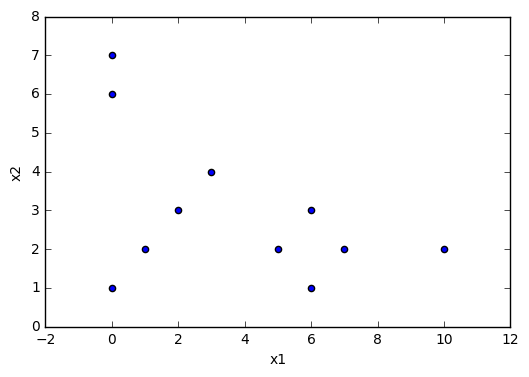

In [2]:
# ******  plotting the written part to make sense of data ****
data_DBSCAN = np.array([[0, 1], 
                        [5, 2], 
                        [2, 3], 
                        [6, 1], 
                        [10, 2],
                        [0, 6], 
                        [3, 4], 
                        [6, 3], 
                        [0, 7], 
                        [7, 2], 
                        [1, 2]])


# print(data_DBSCAN)


df_2 = DataFrame(data_DBSCAN, columns = ['x1', 'x2'])
df_2.plot(kind='scatter', x = 'x1', y = 'x2')
plt.show()

#### Question 2: 
C<sub>1</sub> = {(5, 6), (8, 7), (7, 3)} <br/>
C<sub>2</sub> = {(6, 5), (4, 5), (9, 2), (3, 5), (8, 4)}

a. mean vectors: 
 * m1 = [6.66666, 5.33333] (mean of first cluster (1 × 2))
 * m2 = [6, 4.2]            (mean of second cluster (1 × 2)) 
 
b. total mean vector: 
* m = [6.25, 4.625]       (mean of all points (1 × 2))  


c. Scatter matrices of the clusters 
* S<sub>1</sub> = [[4.6666, 0.333333], [0.33333, 8.66666]]   (scatter matrix of cluster 1 (2 × 2)) 
* S<sub>2</sub> = [[26, -11], [-11, 6.8]]   (scatter matrix of cluster 2 (2 × 2))  
 
d. Within cluster scatter matrix (2 × 2)
* S<sub>w</sub> = S<sub>1</sub> + S<sub>2</sub> = [[30.6666, -10.6666], [-10.6666, 15.46666]]


e. Between cluster scatter matrix (2 × 2)
* S<sub>b</sub> = (m1 - m).T × (m1 - m) = [[0.83333, 1.4166666], [1.4166666, 2.40833333]]

f. evaluation: based on the scattering criteria, this clustering is not good. 
* tr(S<sub>w</sub>)  = 30.6666 + 15.46666  = 46.1333 (want low) (add the diagonal elements in S<sub>W</sub>)
* tr(S<sub>b</sub>)  = 0.83333 + 2.40833333 = 3.2416666 (want high) (add the diagonal elements in S<sub>B</sub>)
* (tr(S<sub>b</sub>)  / tr(S<sub>w</sub>)) = 0.070267 (want high) 



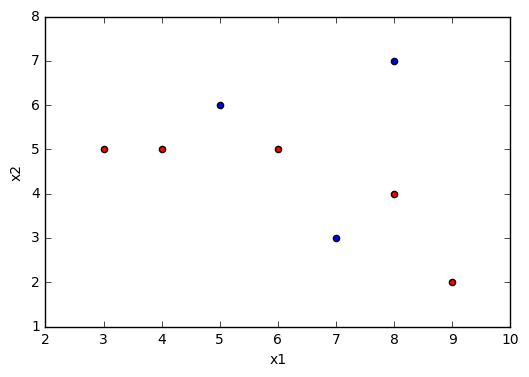

In [3]:
# ******  plotting the written part to make sense of data ****
cluster1 = [[5, 6], [8, 7], [7, 3]]
cluster2 = [[6, 5], [4, 5], [9, 2], [3, 5], [8, 4]]

# all_data = list(cluster1)
# all_data.extend(cluster2)

# cluster1_matrix = np.array(cluster1)
# cluster2_matrix = np.array(cluster2)

# all_data_matrix = np.array(all_data)


df = DataFrame(np.array(cluster1), columns = ['x1', 'x2'])
c1 = df.plot(kind='scatter', x = 'x1', y = 'x2')
# plt.show()

df1 = DataFrame(np.array(cluster2), columns = ['x1', 'x2'])
df1.plot(kind='scatter', x = 'x1', y = 'x2', c = ['red'], ax = c1)
plt.show()
    
# m1 = np.mean(cluster1_matrix, axis=0)
# m2 = np.mean(cluster2_matrix, axis=0)
# m = np.mean(all_data_matrix, axis=0)

# C1_m1 = cluster1_matrix - m1
# C2_m2 = cluster2_matrix - m2

# S1 = np.dot(C1_m1.T, C1_m1)
# S2 = np.dot(C2_m2.T, C2_m2)
# S_W = S1 + S2 

# m_1 = np.array([(m1 - m)])
# m_2 = np.array([(m2 - m)])
# S_B = np.dot(m_1.T, m_1) * 3 + np.dot(m_2.T, m_2) * 5
# np.shape(S_B)
# print(S_B.trace()/ S_W.trace())

### Programming part: 

In [4]:
data1 = np.loadtxt("datasets/datasets/dataset1.txt",
                    dtype = {'names': ('x1', 'x2', 'label'), 'formats': (float, float, int)},
                    delimiter="\t")
data2 = np.loadtxt("datasets/datasets/dataset2.txt",
                   dtype = {'names': ('x1', 'x2', 'label'), 'formats': (float, float, int)}, 
                   delimiter="\t")
data3 = np.loadtxt("datasets/datasets/dataset3.txt",
                   dtype = {'names': ('x1', 'x2', 'label'), 'formats': (float, float, int)}, 
                   delimiter="\t")

In [5]:
def create_io_matrix(d): 
    """
    formats the input data in a matrix format (n × d) where d is the number of dimentions and n is the number of data points 
    formats the label data in a matrix format (n × 1) where n is the number of data points 
    """
    matrix_input = [[x1, x2] for x1, x2, l in d]
    matrix_labels = [l for x1, x2, l in d]
    
    return (np.array(matrix_input), np.array(matrix_labels))

In [6]:
### number of clusters = 3
data1_matrix, data1_labels = create_io_matrix(data1)
# print(len(data1))
print(np.shape(data1_matrix))
# print(np.shape(data1_labels))
# print(data1_labels)
### number of cluster = 3
data2_matrix, data2_labels = create_io_matrix(data2)
# print(len(data2))
# print(np.shape(data2_matrix))
# print(np.shape(data2_labels))
# print(data2_labels)
### number of clusters = 2
data3_matrix, data3_labels = create_io_matrix(data3)
# print(len(data3))
# print(np.shape(data3_matrix))
# print(np.shape(data3_labels))

(150, 2)


=================== data 1 ======================


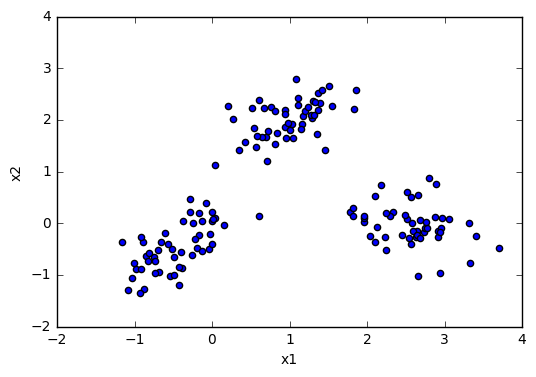

===================== data 2 ===================


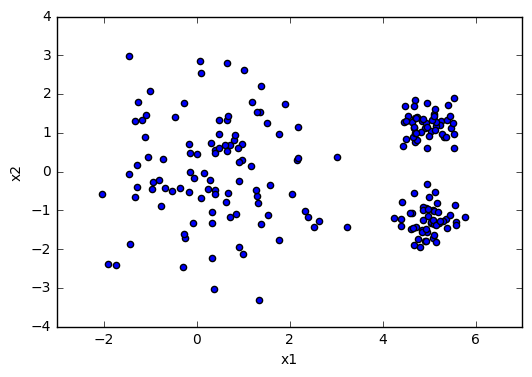

================= data 3 ==================


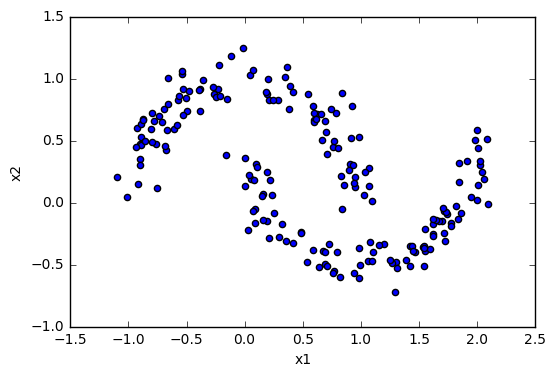

In [7]:
############# initial data visualization 

df_1 = DataFrame(data1_matrix, columns = ['x1', 'x2'])
df_1.plot(kind='scatter', x = 'x1', y = 'x2')

print("=================== data 1 ======================")
plt.show()

df_2 = DataFrame(data2_matrix, columns = ['x1', 'x2'])
df_2.plot(kind='scatter', x = 'x1', y = 'x2')

print("===================== data 2 ===================")
plt.show()

df_3 = DataFrame(data3_matrix, columns = ['x1', 'x2'])
df_3.plot(kind='scatter', x = 'x1', y = 'x2')

print("================= data 3 ==================")
plt.show()

based on the plotting of the points above, I would predict that k-means would be the best algorithm to get the clusters is k-means with 3 clusters 



## DBSCAN Algorithm (Q4)

In [8]:
### DBSCAN Algorithm: 

def DBSCAN(eps, min_points, input_matrix): 
    """
    """
    visited = []
    noise = []
    clusters = {}
    c_index = 0
    
    print("running DBSCAN with eps = {}, and min_pts = {}".format(eps, min_points))
  
    for p in input_matrix:
        if list(p) in visited: 
            continue
            
        if list(p) not in visited:
            visited.append(list(p))
            neighbors = region_query(p, eps, input_matrix) 
            if len(neighbors) < min_points:
                noise.append(list(p))
            else: 
                c_index += 1
                visited, clusters, noise = expand_cluster(p, neighbors, eps, min_points,
                                                          visited, clusters, c_index,
                                                          input_matrix, noise)    
    return (visited, clusters, noise)
            

def expand_cluster(p, neighbors, eps, min_points, visited, clusters, c_index, input_matrix, noise): 
    """
    """
    clusters[c_index] = [list(p)]
    for q in neighbors: 
        if list(q) not in visited: 
            visited.append(list(q))
            new_neighbors = region_query(q, eps, input_matrix)
            if len(new_neighbors) >= min_points: 
                neighbors.extend(new_neighbors)

        if not member_cluster(list(q), clusters):
            clusters[c_index].append(list(q))
            if list(q) in noise: 
                noise.remove(list(q))
            
    return visited, clusters, noise
            
def member_cluster(q, clusters):
    for _, c in clusters.items(): 
        if list(q) in c:
            return True
    return False

def region_query(p, eps, input_matrix): 
    """
    :return: all points within P's eps-neighborhood (including P)
    """
    eps_neighbors = [list(x) for x in input_matrix if (distance.euclidean(x, p) <= eps)]
    return eps_neighbors
    


In [9]:
### running DBSCAN on the data #1 

print("running DBSCAN on the first dataset: ")
visited111, clusters111, noise111 = DBSCAN(0.2, 2, data1_matrix)
visited112, clusters112, noise112 = DBSCAN(0.2, 3, data1_matrix)
visited113, clusters113, noise113 = DBSCAN(0.2, 4, data1_matrix)

visited121, clusters121, noise121 = DBSCAN(0.3, 2, data1_matrix)
visited122, clusters122, noise122 = DBSCAN(0.3, 3, data1_matrix)
visited123, clusters123, noise123 = DBSCAN(0.3, 4, data1_matrix)

visited131, clusters131, noise131 = DBSCAN(0.4, 2, data1_matrix)
visited132, clusters132, noise132 = DBSCAN(0.4, 3, data1_matrix)
visited133, clusters133, noise133 = DBSCAN(0.4, 4, data1_matrix)


print("done running DBSCAN on the first dataset")

running DBSCAN on the first dataset: 
running DBSCAN with eps = 0.2, and min_pts = 2
running DBSCAN with eps = 0.2, and min_pts = 3
running DBSCAN with eps = 0.2, and min_pts = 4
running DBSCAN with eps = 0.3, and min_pts = 2
running DBSCAN with eps = 0.3, and min_pts = 3
running DBSCAN with eps = 0.3, and min_pts = 4
running DBSCAN with eps = 0.4, and min_pts = 2
running DBSCAN with eps = 0.4, and min_pts = 3
running DBSCAN with eps = 0.4, and min_pts = 4
done running DBSCAN on the first dataset


In [10]:
### running DBSCAN on the data #2

print("running DBSCAN on the second dataset: ")
visited211, clusters211, noise211 = DBSCAN(0.8, 6, data2_matrix)
visited212, clusters212, noise212 = DBSCAN(0.8, 7, data2_matrix)
visited213, clusters213, noise213 = DBSCAN(0.8, 8, data2_matrix)

visited221, clusters221, noise221 = DBSCAN(0.85, 6, data2_matrix)
visited222, clusters222, noise222 = DBSCAN(0.85, 7, data2_matrix)
visited223, clusters223, noise223 = DBSCAN(0.85, 8, data2_matrix)

visited231, clusters231, noise231 = DBSCAN(0.9, 6, data2_matrix)
visited232, clusters232, noise232 = DBSCAN(0.9, 7, data2_matrix)
visited233, clusters233, noise233 = DBSCAN(0.9, 8, data2_matrix)


print("done running DBSCAN on the second dataset")

running DBSCAN on the second dataset: 
running DBSCAN with eps = 0.8, and min_pts = 6
running DBSCAN with eps = 0.8, and min_pts = 7
running DBSCAN with eps = 0.8, and min_pts = 8
running DBSCAN with eps = 0.85, and min_pts = 6
running DBSCAN with eps = 0.85, and min_pts = 7
running DBSCAN with eps = 0.85, and min_pts = 8
running DBSCAN with eps = 0.9, and min_pts = 6
running DBSCAN with eps = 0.9, and min_pts = 7
running DBSCAN with eps = 0.9, and min_pts = 8
done running DBSCAN on the second dataset


In [11]:
### running DBSCAN on the data #3

print("running DBSCAN on the third dataset: ")

visited311, clusters311, noise311 = DBSCAN(0.2, 5, data3_matrix)
visited312, clusters312, noise312 = DBSCAN(0.2, 6, data3_matrix)
visited313, clusters313, noise313 = DBSCAN(0.2, 7, data3_matrix)

visited321, clusters321, noise321 = DBSCAN(0.3, 5, data3_matrix)
visited322, clusters322, noise322 = DBSCAN(0.3, 6, data3_matrix)
visited323, clusters323, noise323 = DBSCAN(0.3, 7, data3_matrix)

visited331, clusters331, noise331 = DBSCAN(0.4, 5, data3_matrix)
visited332, clusters332, noise332 = DBSCAN(0.4, 6, data3_matrix)
visited333, clusters333, noise333 = DBSCAN(0.4, 7, data3_matrix)

print("done running DBSCAN on the third dataset")

running DBSCAN on the third dataset: 
running DBSCAN with eps = 0.2, and min_pts = 5
running DBSCAN with eps = 0.2, and min_pts = 6
running DBSCAN with eps = 0.2, and min_pts = 7
running DBSCAN with eps = 0.3, and min_pts = 5
running DBSCAN with eps = 0.3, and min_pts = 6
running DBSCAN with eps = 0.3, and min_pts = 7
running DBSCAN with eps = 0.4, and min_pts = 5
running DBSCAN with eps = 0.4, and min_pts = 6
running DBSCAN with eps = 0.4, and min_pts = 7
done running DBSCAN on the third dataset


### Evaluating DBSCAN with different eps and min_pts


In [12]:
def get_clustering_labels_dbscan(clusters, noise, data_matrix): 
    """
    0 is noise 
    """
    all_data = [list(p) for p in data_matrix]
    labels = []
    for c_i, c in clusters.items(): 
        for p in c: 
            i = all_data.index(p)
            labels.insert(i+1, c_i)
    for p in noise: 
        i = all_data.index(p)
        labels.insert(i+1, 0)
    return labels

def get_clustering_scores(data_matrix, true_labels, clusterings_and_noise): 
    """
    """
    clustering, noise, clustering_name = clusterings_and_noise
    predicted_labels = get_clustering_labels_dbscan(clustering, noise, data_matrix)
    print(len(predicted_labels))
    print(np.shape(data_matrix))
    print(clustering_name)
    print(len(clustering), len(noise))
    print("\t NMI: ", normalized_mutual_info_score(true_labels, predicted_labels))
    print("\t SC: ", silhouette_score(data_matrix, predicted_labels)) 
    print("\t CH: ", calinski_harabaz_score(data_matrix, predicted_labels))
    

name_temp = "clustering data {} using dbscan with eps = {} and  min_pts = {}"

clusterings_and_noise = {1: [
                            (clusters111, noise111, name_temp.format(1, 0.2, 2)), 
                            (clusters112, noise112, name_temp.format(1, 0.2, 3)),
                            (clusters113, noise113, name_temp.format(1, 0.2, 4)), 

                            (clusters121, noise121, name_temp.format(1, 0.3, 2)), 
                            (clusters122, noise122, name_temp.format(1, 0.3, 3)),
                            (clusters123, noise123, name_temp.format(1, 0.3, 4)), 

                            (clusters131, noise131, name_temp.format(1, 0.4, 2)), 
                            (clusters132, noise132, name_temp.format(1, 0.4, 3)),
                            (clusters133, noise133, name_temp.format(1, 0.4, 4))
                            ], 
                        
                        2: [
                            (clusters211, noise211, name_temp.format(2, 0.8, 6)), 
                            (clusters212, noise212, name_temp.format(2, 0.8, 7)), 
                            (clusters213, noise213, name_temp.format(2, 0.8, 8)),

                            (clusters221, noise221, name_temp.format(2, 0.85, 6)), 
                            (clusters222, noise222, name_temp.format(2, 0.85, 7)), 
                            (clusters223, noise223, name_temp.format(2, 0.85, 8)), 

                            (clusters231, noise231, name_temp.format(2, 0.9, 6)),
                            (clusters232, noise232, name_temp.format(2, 0.9, 7)), 
                            (clusters233, noise233, name_temp.format(2, 0.9, 8))
                           ], 
                        
                        3: [
                            (clusters311, noise311, name_temp.format(3, 0.2, 5)), 
                            (clusters312, noise312, name_temp.format(3, 0.2, 6)), 
                            (clusters313, noise313, name_temp.format(3, 0.2, 7)), 

                            (clusters321, noise321, name_temp.format(3,0.3, 5)), 
                            (clusters322, noise322, name_temp.format(3,0.3, 6)), 
                            (clusters323, noise323, name_temp.format(3,0.3, 7)), 

                            (clusters331, noise331 , name_temp.format(3, 0.4, 5)), 
                            (clusters332, noise332 , name_temp.format(3, 0.4, 6)), 
                            (clusters333, noise333 , name_temp.format(3, 0.4, 7))
    ]} 


    
# get_clustering_scores(data3_matrix, data3_labels, clusterings_and_noise[3][4])

In [13]:
for i, cs_ns in clusterings_and_noise.items(): 
    for cs_n in cs_ns: 
        print(" ---------------------------------------------- ")       
        try: 
            if i == 1: 
                get_clustering_scores(data1_matrix, data1_labels, cs_n)
            if i == 2: 
                get_clustering_scores(data2_matrix, data2_labels, cs_n)
            if i == 3:
                get_clustering_scores(data3_matrix, data3_labels, cs_n)
        except ValueError as error: 
            print("only found one cluster ", cs_n[2])

 ---------------------------------------------- 
150
(150, 2)
clustering data 1 using dbscan with eps = 0.2 and  min_pts = 2
10 22
	 NMI:  0.646195546176
	 SC:  -0.0516638088132
	 CH:  47.7051454088
 ---------------------------------------------- 
150
(150, 2)
clustering data 1 using dbscan with eps = 0.2 and  min_pts = 3
8 26
	 NMI:  0.639288539112
	 SC:  0.00493412605307
	 CH:  51.068307666
 ---------------------------------------------- 
150
(150, 2)
clustering data 1 using dbscan with eps = 0.2 and  min_pts = 4
7 34
	 NMI:  0.606522607116
	 SC:  -0.0266342173032
	 CH:  43.5332413573
 ---------------------------------------------- 
150
(150, 2)
clustering data 1 using dbscan with eps = 0.3 and  min_pts = 2
8 8
	 NMI:  0.808041793035
	 SC:  0.0910046812406
	 CH:  117.829730523
 ---------------------------------------------- 
150
(150, 2)
clustering data 1 using dbscan with eps = 0.3 and  min_pts = 3
4 16
	 NMI:  0.812684971619
	 SC:  0.342922761635
	 CH:  172.759943135
 -------------

In [14]:
def plotPointsBasedOnLabels(clusters, noise, colors, original_labels, data, shapes): 
    """
    black is noise
    """
    K = len(clusters)
    print("number of clusters: ", K)
    all_points = [list(p) for p in data]
    number_of_original_label = len(list(set(original_labels)))
    for k in range(1, K+1): 
        for p in clusters[k]: 
            i = all_points.index(list(p))
            plt.scatter(p[0], p[1], color=colors[k-1], marker=shapes[original_labels[i] - 1])
    if noise:
        for p in noise:
            i = all_points.index(list(p))
            plt.scatter(p[0], p[1], color="black", marker=shapes[original_labels[i] - 1])
    plt.show()

 clustering data 1 using dbscan with eps = 0.4 and  min_pts = 3 
 	 NMI:  0.926171848823 	 SC:  0.585198949456 	 CH:  326.978541133
number of clusters:  3


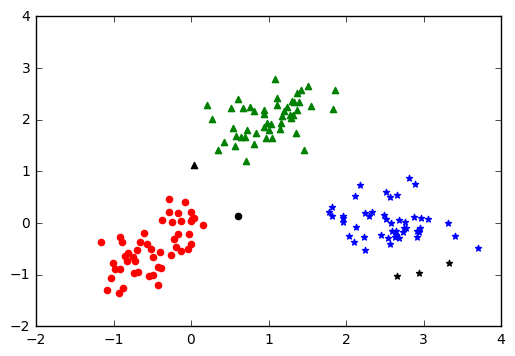

clustering data 2 using dbscan with eps = 0.9 and  min_pts = 6 
 	 NMI:  0.908790490113 	 SC:  0.415764191075 	 CH:  206.827386859
number of clusters:  3


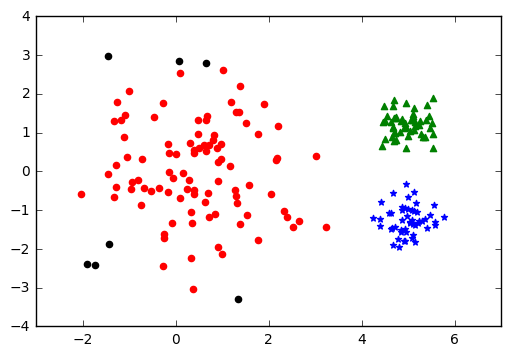

clustering data 3 using dbscan with eps = 0.3 and  min_pts = 7 
 	 NMI:  1.0 	 SC:  0.362298541786 	 CH:  162.813208069
number of clusters:  2


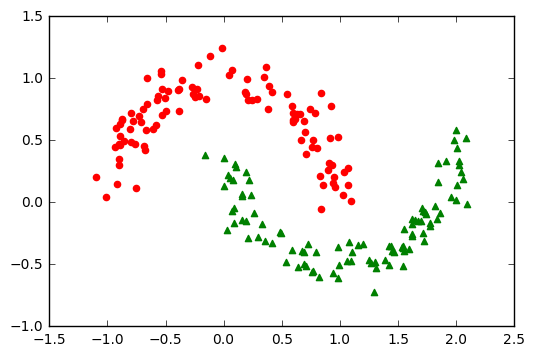

In [14]:
### only plotting the ones with the highest clustering evaluation score: 

print(" clustering data 1 using dbscan with eps = 0.4 and  min_pts = 3", 
      "\n \t NMI:  0.926171848823 \t SC:  0.585198949456 \t CH:  326.978541133")
plotPointsBasedOnLabels(clusters132, noise132, ["r", "g", "b"], data1_labels, data1_matrix, ['o', '^', '*'])

print("clustering data 2 using dbscan with eps = 0.9 and  min_pts = 6", 
      "\n \t NMI:  0.908790490113 \t SC:  0.415764191075 \t CH:  206.827386859") 
plotPointsBasedOnLabels(clusters231, noise231, ["r", "g", "b"], data2_labels, data2_matrix, ['o', '^', '*'])


print("clustering data 3 using dbscan with eps = 0.3 and  min_pts = 7", 
      "\n \t NMI:  1.0 \t SC:  0.362298541786 \t CH:  162.813208069")

plotPointsBasedOnLabels(clusters323, noise323, ["r", "g", "b"], data3_labels, data3_matrix, ['o', '^', '*'])

### K-means implementation: 


In [22]:
#### K-means algorithm 
## * should preform multiple random initializations and keep the best 
## ---- not crash when initialization results in empty clusters


def k_means(K, input_matrix, initial_means = False,num_restarts = 100):
    """
    """
    clusterings = []
    sses = []
    for i in range(num_restarts): 
        if i == 0: 
            cluster_assignments, cluster_means, sse = K_means_helper(K, input_matrix, initial_means = initial_means)
            clusterings.append((cluster_assignments, cluster_means))
            sses.append(sse)  
        else: 
            cluster_assignments, cluster_means, sse = K_means_helper(K, input_matrix, initial_means = False)
            clusterings.append((cluster_assignments, cluster_means))
            sses.append(sse)  
    return clusterings[sses.index(min(sses))][0],clusterings[sses.index(min(sses))][1] , min(sses)

def K_means_helper(K, input_matrix, initial_means = False): 
    """
    K: number of clusters 
    ...
    """
    N, d = np.shape(input_matrix)
    if isinstance(initial_means, bool): 
        randomInts = [random.randint(1, N-1)  for i in range(K)]
        cluster_means = [input_matrix[i] for i in randomInts]
    else: 
        cluster_means = initial_means

    cluster_assignments = get_cluster_assignments(K, cluster_means, input_matrix)
    sse = compute_sse(input_matrix, cluster_assignments, cluster_means, K)

    converged = False
    i = 0 
    while not converged:
        prev_cluster_assignments = cluster_assignments
        prev_means = cluster_means
        prev_sse = sse


        cluster_means = get_cluster_means(K, cluster_assignments, input_matrix)
        cluster_assignments = get_cluster_assignments(K, cluster_means, input_matrix)
        sse = compute_sse(input_matrix, cluster_assignments, cluster_means, K)

        converged = converged_check(prev_cluster_assignments, cluster_assignments, cluster_means, prev_means, prev_sse, sse, i)
        i = i + 1

    return (cluster_assignments, cluster_means, sse)

def converged_check(cluster_assignments_prev, cluster_assignments, cluster_means, cluster_means_prev, prev_sse, sse, i): 
    """
    """
#     print("same cluster assignement?: ", np.array_equal(cluster_assignments_prev, cluster_assignments))
#     print("same cluster means?: ", np.array_equal(cluster_means, cluster_means_prev))
#     print("same sse?:", (prev_sse == sse))
    if i == 99: 
        "print i = 99"
    return  np.array_equal(cluster_assignments_prev, cluster_assignments) or\
            np.array_equal(cluster_means, cluster_means_prev) or\
            (prev_sse == sse) or\
            (i == 100)
            
            
def get_cluster_assignments(K, cluster_means, input_matrix): 
    """
    """
    N, d = np.shape(input_matrix)
    cluster_assignments = np.zeros((N, K))
    ### the rows are one hot vectors which indicate whether the data point is in the cluster
    
    for i in range(N): 
        x_i = input_matrix[i]
        distances = list(map(lambda m: distance.euclidean(x_i, m), cluster_means))
        k = distances.index(min(distances))
        cluster_assignments[i, k] = 1
    return cluster_assignments
        
def get_cluster_means(K, cluster_assignments, input_matrix):
    """
    """
    N, d = np.shape(input_matrix)
    new_means = [0 for i in range(K)]
    
    for k in range(K):
        c = cluster_assignments[:, k]
        den = np.sum(cluster_assignments, axis = 0)[0]
        num = 0
        for i in range(N): 
            if cluster_assignments[i, k] == 1: 
                num += input_matrix[i]
        if num is 0: 
            new_means[k] = [0 for i in range(d)]
        else:
            new_means[k] = num/den
            
    return new_means

def compute_sse(input_matrix, clustering_assignments, cluster_means, K): 
    """
    """
    SSE_list = []
    for k in range(K): 
        cluster_k =  getClusteredData(input_matrix, clustering_assignments, k)
        if len(cluster_k) == 0: 
            sse_k = 0
            
        else: 
            mean_k = np.resize(cluster_means[k], np.shape(cluster_k))
            sse_k = np.linalg.norm((cluster_k - mean_k), ord=2,axis = 0).sum(axis=0)
        SSE_list.append(sse_k) 
    return sum(SSE_list)

def getClusteredData(input_matrix, cluster_assignments, k):
    """
    """
#     elements_in_cluster = cluster_assignments[:, :, None] * input_matrix[:, None, :]
#     wanted = elements_in_cluster
# #     print("wanted ", k, " ", np.shape(wanted[:, k]))
#     return wanted[np.nonzero(wanted)]
    wanted = cluster_assignments[:, k]
    wanted_X = []
   
    for i in range(len(wanted)):
        if cluster_assignments[i][k] == 1: 
            wanted_X.append(input_matrix[i])
            
    return wanted_X


In [23]:
def plot_kmean_labels(input_matrix, cluster_assignments, centroids, original_labels, K, colors,  shapes):    
    """
    black is noise
    """
    all_points = [list(p) for p in input_matrix]
    number_of_original_label = len(list(set(original_labels)))
    for k in range(K):
        clustered_k = getClusteredData(input_matrix, cluster_assignments, k)
        print("k: ", k, "c_k: ", len(clustered_k))
        for p in list(clustered_k): 
            i = all_points.index(list(p))
            plt.scatter(p[0], p[1], color=colors[k-1], marker=shapes[original_labels[i] - 1])
            
    for c_m in centroids: 
        print(c_m)
        plt.scatter(c_m[0], c_m[1], color='black', s = 25, marker = 'x')
   
    plt.show()


the clustering results of data 1 with K = 1
k:  0 c_k:  150
[ 1.03308873  0.5056341 ]


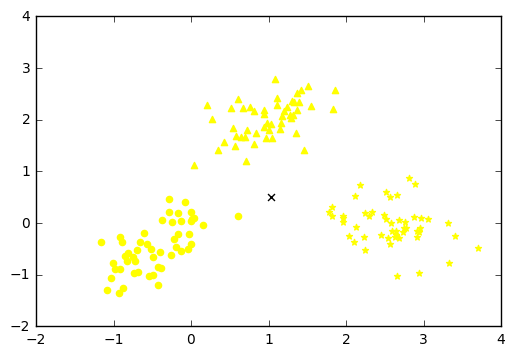

the clustering results of data 1 with K = 2
k:  0 c_k:  50
k:  1 c_k:  100
[ 2.57372644 -0.02746257]
[ 0.52553976  1.54436487]


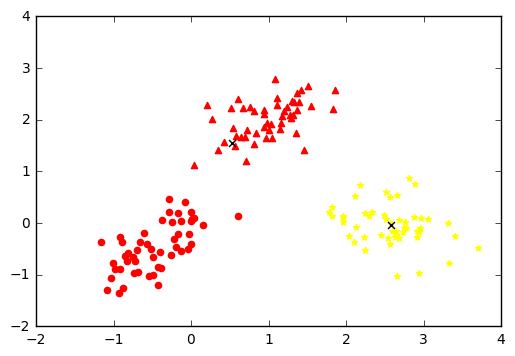

the clustering results of data 1 with K = 3
k:  0 c_k:  50
k:  1 c_k:  50
k:  2 c_k:  50
[ 0.98887662  2.01047897]
[-0.46333686 -0.4661141 ]
[ 2.57372644 -0.02746257]


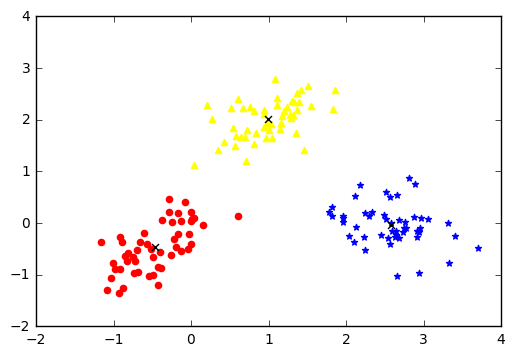

the clustering results of data 1 with K = 4
k:  0 c_k:  50
k:  1 c_k:  35
k:  2 c_k:  16
k:  3 c_k:  49
[ 2.57372644 -0.02746257]
[-0.44486403 -0.49577542]
[-0.01769454  0.05199344]
[ 0.98809833  1.98814685]


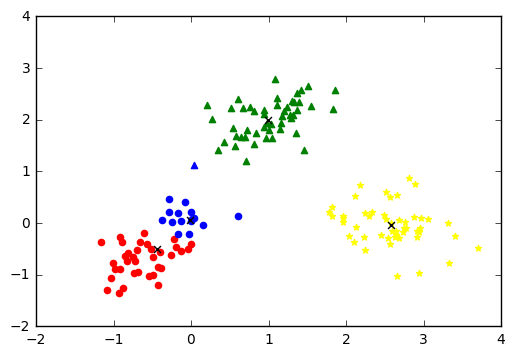

the clustering results of data 1 with K = 5
k:  0 c_k:  33
k:  1 c_k:  43
k:  2 c_k:  44
k:  3 c_k:  18
k:  4 c_k:  12
[-0.68699358 -0.73611263]
[ 1.43672336  2.82922548]
[ 3.66856163 -0.07161302]
[ 0.06207786  0.36884939]
[ 0.36223416 -0.02018938]


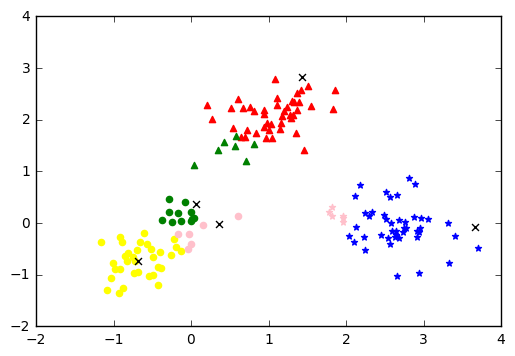

the clustering results of data 2 with K = 1
k:  0 c_k:  200
[ 2.68923002 -0.00881251]


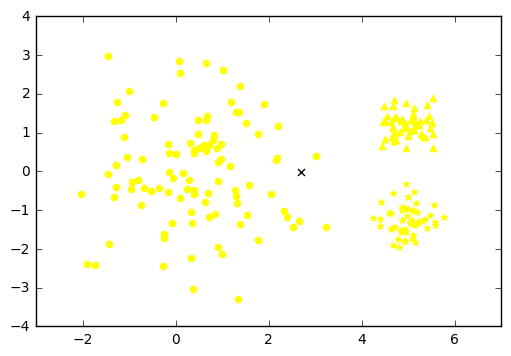

the clustering results of data 2 with K = 2
k:  0 c_k:  103
k:  1 c_k:  97
[ 4.9211995  -0.04395107]
[ 0.30060636  0.02683941]


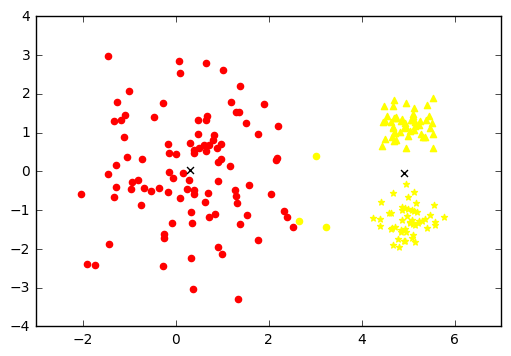

the clustering results of data 2 with K = 3
k:  0 c_k:  51
k:  1 c_k:  52
k:  2 c_k:  97
[ 4.93222653  1.19661207]
[ 5.00666658 -1.285376  ]
[ 0.60710697  0.05420509]


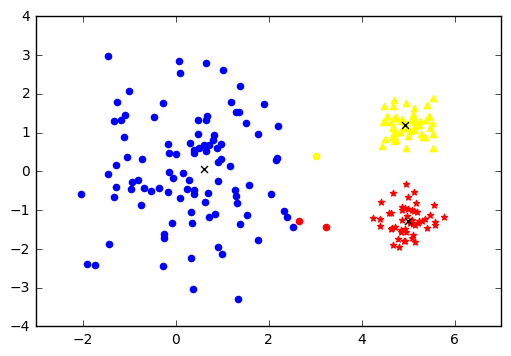

the clustering results of data 2 with K = 4
k:  0 c_k:  51
k:  1 c_k:  51
k:  2 c_k:  51
k:  3 c_k:  47
[ 0.2425968  -1.02917265]
[ 5.10679991 -1.31108352]
[ 5.03087106  1.22054431]
[ 0.37665231  1.08446184]


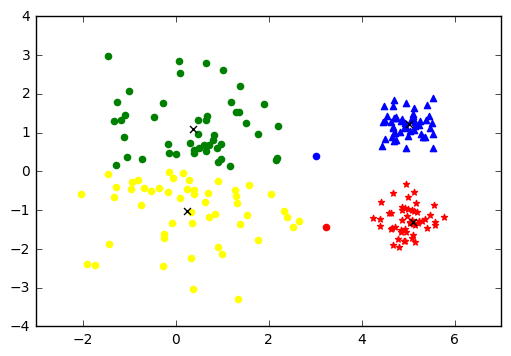

the clustering results of data 2 with K = 5
k:  0 c_k:  51
k:  1 c_k:  35
k:  2 c_k:  51
k:  3 c_k:  25
k:  4 c_k:  38
[ 4.95482028 -1.26055076]
[ 0.50604921 -0.91883341]
[ 4.93222653  1.19661207]
[-0.37051759  0.01704308]
[ 0.52342164  0.93117017]


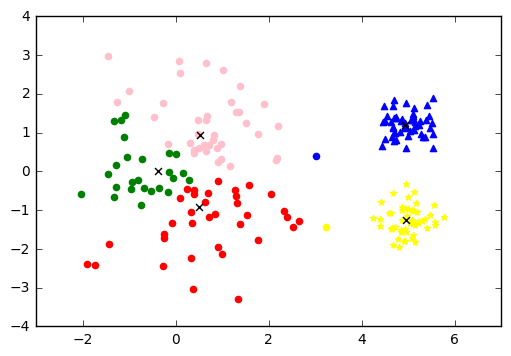

the clustering results of data 3 with K = 1
k:  0 c_k:  200
[ 0.54921764  0.23684591]


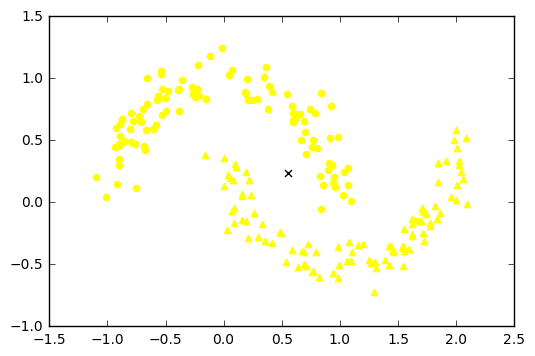

the clustering results of data 3 with K = 2
k:  0 c_k:  101
k:  1 c_k:  99
[-0.16925707  0.58504174]
[ 1.25681675 -0.11603993]


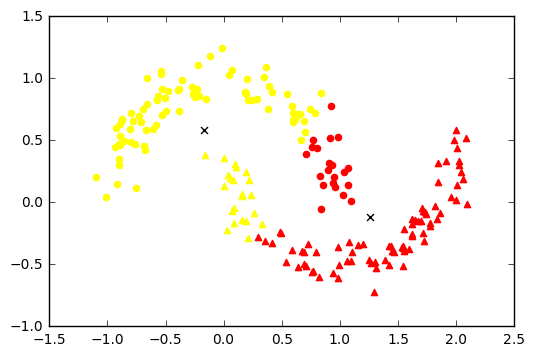

the clustering results of data 3 with K = 3
k:  0 c_k:  62
k:  1 c_k:  79
k:  2 c_k:  59
[ 1.58099455 -0.18195754]
[ 0.70213979  0.27759235]
[-0.51146454  0.66838426]


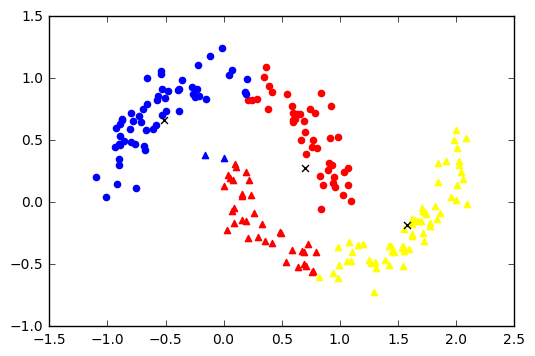

the clustering results of data 3 with K = 4
k:  0 c_k:  49
k:  1 c_k:  52
k:  2 c_k:  53
k:  3 c_k:  46
[ 0.43051226  0.61167817]
[-0.67490892  0.72886184]
[ 0.80770828 -0.25741879]
[ 1.72509521 -0.09626326]


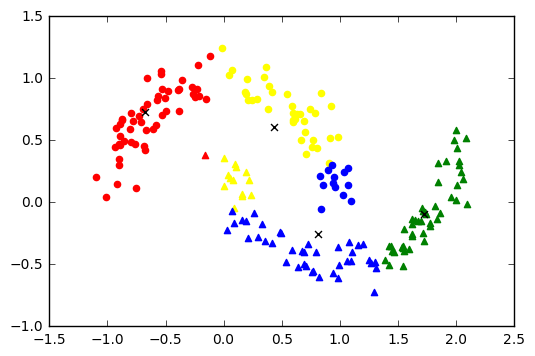

the clustering results of data 3 with K = 5
k:  0 c_k:  46
k:  1 c_k:  43
k:  2 c_k:  51
k:  3 c_k:  24
k:  4 c_k:  36
[ 1.74333588 -0.07843638]
[ 0.85480634 -0.24855382]
[-0.70081772  0.75220941]
[ 0.07063328  0.01603107]
[ 0.419945    0.58851454]


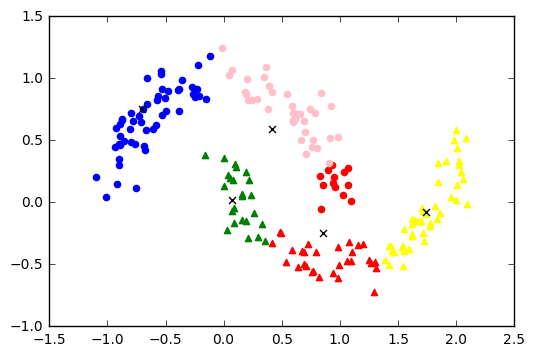

In [25]:
########### run k-means: 

def plot_k_means(data_matrix, K, original_labels, clustering_text, num_restarts=100, initial_means=False): 
    """ 
    """
    print(clustering_text)
    cluster_assignments, cluster_means, sse = k_means(K, data_matrix, num_restarts=num_restarts)
    plot_kmean_labels(data_matrix,
                        cluster_assignments, 
                        cluster_means,
                        original_labels, 
                        K, 
                        ["red", "blue", "green", "pink", "yellow"], 
                        ["o", "^", "*", "s", "D"])
    return cluster_assignments, cluster_means, sse
    


clustering_text = "the clustering results of data {} with K = {}"

data1_cluster_assignments = [plot_k_means(data1_matrix, K, data1_labels, clustering_text.format(1, K), num_restarts = 1) for K in range(1, 6)]

data2_cluster_assignments = [plot_k_means(data2_matrix, K, data2_labels, clustering_text.format(2, K)) for K in range(1, 6)]

data3_cluster_assignments = [plot_k_means(data3_matrix, K, data3_labels, clustering_text.format(3, K)) for K in range(1, 6)]




### Evaluation of k-means with different Ks

In [20]:
def get_predicted_labels(clustering_assigments):
    """
    """
    pred_labels = []
    for c_a in clustering_assigments:
        pred_labels.append(list(c_a).index(max(list(c_a))) + 1)
    return pred_labels

In [21]:
def get_clustering_scores_k_means(data_matrix, true_labels, clusterings_sse): 
    """
    """
    cluster_assignments, cluster_means, sse = clusterings_sse
    predicted_labels = get_predicted_labels(cluster_assignments)
    
    NMI = normalized_mutual_info_score(true_labels, predicted_labels)
    SC = 0 
    CH = 0
    try: 
        SC = silhouette_score(data_matrix, predicted_labels)
        CH = calinski_harabaz_score(data_matrix, predicted_labels)
    except ValueError: 
        print("number of clusters = 1")
        
    print("\t NMI: ", NMI)
    print("\t SC: ", SC) 
    print("\t CH: ", CH)
    print("\t SSE: ", sse)
    print("------------------------------------------")
    
    return (NMI, SC, CH, sse)

In [22]:
scores_clustering_data1 = [get_clustering_scores_k_means(data1_matrix, data1_labels, data1_cluster_assignments[i]) 
                           for i in range(5)]

print("========================= scores for data 2 =========================")

scores_clustering_data2 = [get_clustering_scores_k_means(data2_matrix, data2_labels, data2_cluster_assignments[i]) 
                           for i in range(5)]

print("========================= scores for data 3 =========================")

scores_clustering_data3 = [get_clustering_scores_k_means(data3_matrix, data3_labels, data3_cluster_assignments[i]) 
                           for i in range(5)]

number of clusters = 1
	 NMI:  -4.99600361081e-06
	 SC:  0
	 CH:  0
	 SSE:  15.0565648009
------------------------------------------
	 NMI:  0.724927165677
	 SC:  0.533082878752
	 CH:  163.903539309
	 SSE:  13.3731596044
------------------------------------------
	 NMI:  1.0
	 SC:  0.722205425437
	 CH:  599.538582562
	 SSE:  8.61226734547
------------------------------------------
	 NMI:  0.894991283334
	 SC:  0.624454356003
	 CH:  524.454220341
	 SSE:  8.71825480074
------------------------------------------
	 NMI:  0.871070609169
	 SC:  0.542615028991
	 CH:  400.326268232
	 SSE:  9.08967000003
------------------------------------------
========================= scores for data 2 =========================
number of clusters = 1
	 NMI:  -2.22044604925e-06
	 SC:  0
	 CH:  0
	 SSE:  26.518696893
------------------------------------------
	 NMI:  0.758627576429
	 SC:  0.607809735097
	 CH:  439.178648522
	 SSE:  20.573302768
------------------------------------------
	 NMI:  0.931130833729

data 1 NMI scores for clusters with k in the x axis and the score in the y


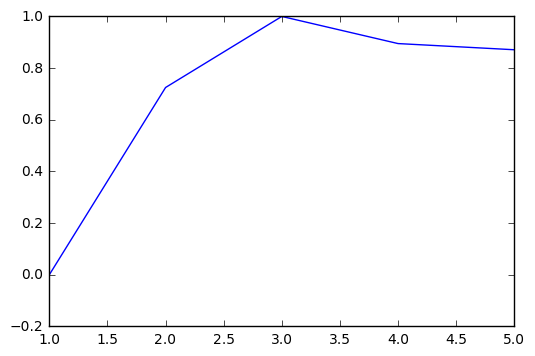

data 1 CH scores for clusters with k in the x axis and the score in the y


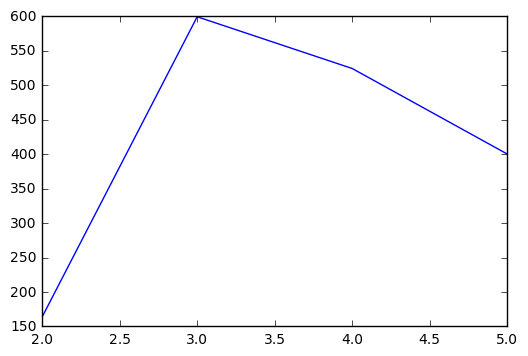

data 1 SC scores for clusters with k in the x axis and the score in the y


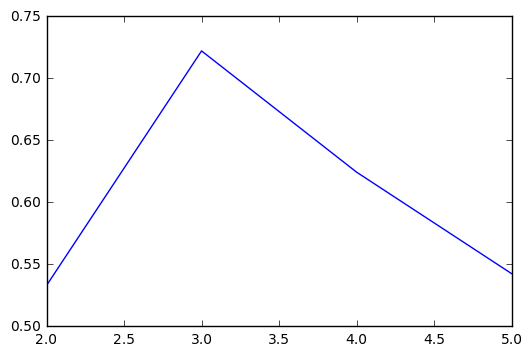

data 1 sse scores for clusters with k in the x axis and the score in the y


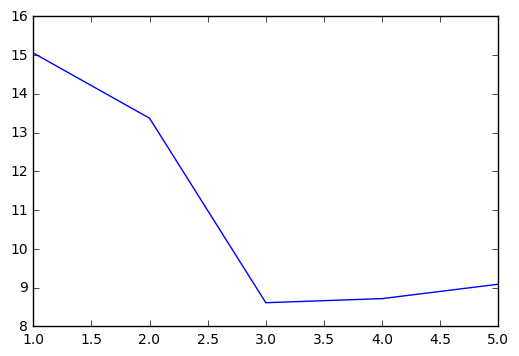

data 2 NMI scores for clusters with k in the x axis and the score in the y


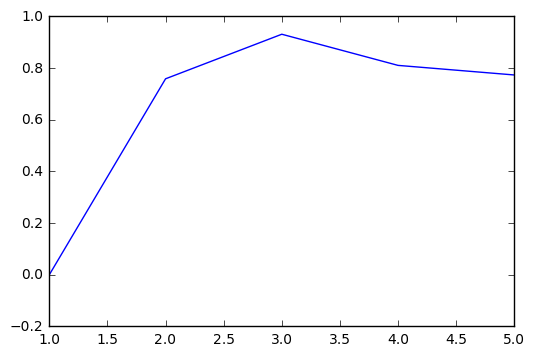

data 2 CH scores for clusters with k in the x axis and the score in the y


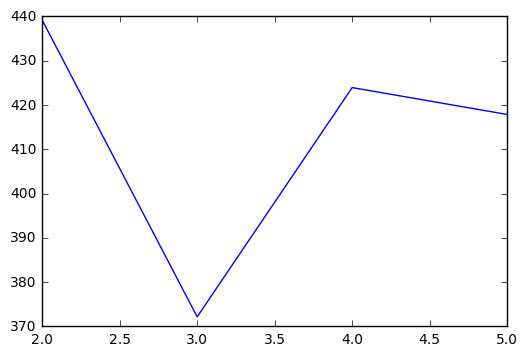

data 2 SC scores for clusters with k in the x axis and the score in the y


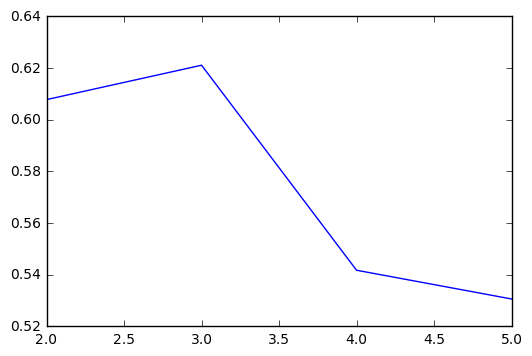

data 2 sse scores for clusters with k in the x axis and the score in the y


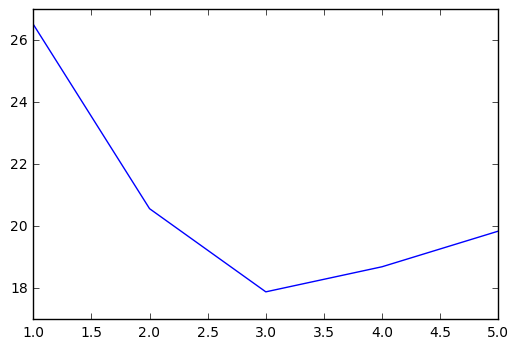

data 3 NMI scores for clusters with k in the x axis and the score in the y


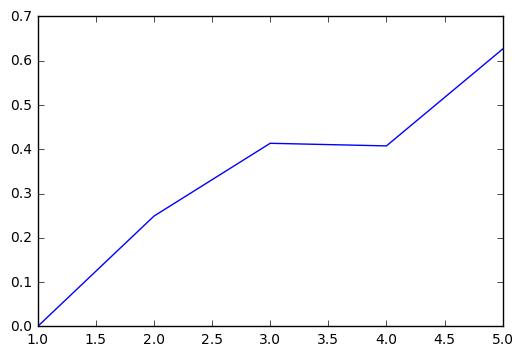

data 3 CH scores for clusters with k in the x axis and the score in the y


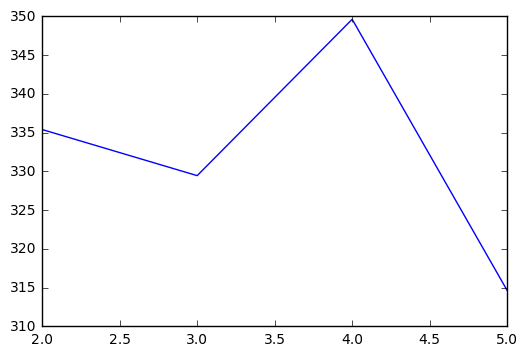

data 3 SC scores for clusters with k in the x axis and the score in the y


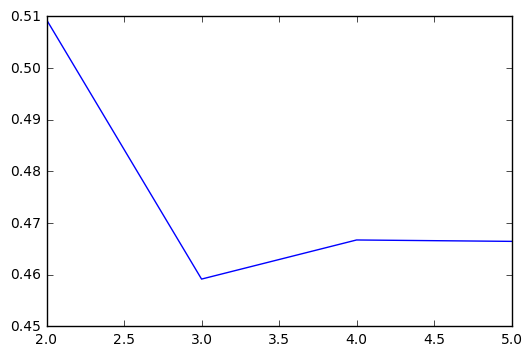

data 3 sse scores for clusters with k in the x axis and the score in the y


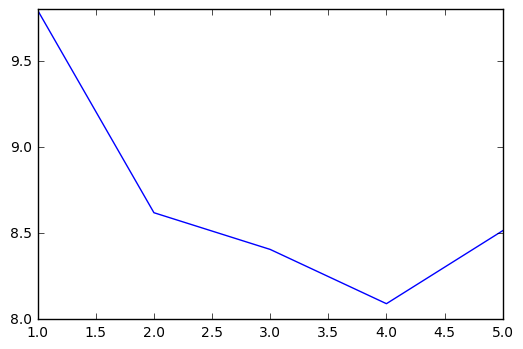

In [23]:
NMI_data1 = []
SC_data1 = []
CH_data1 = []
sse_data1 = []

for NMI, SC, CH, sse in scores_clustering_data1: 
    NMI_data1.append(NMI)
    SC_data1.append(SC)
    CH_data1.append(CH)
    sse_data1.append(sse)
###################################################    
NMI_data2 = []
SC_data2 = []
CH_data2 = []
sse_data2 = []

for NMI, SC, CH, sse in scores_clustering_data2: 
    NMI_data2.append(NMI)
    SC_data2.append(SC)
    CH_data2.append(CH)
    sse_data2.append(sse)

########################################################

NMI_data3 = []
SC_data3 = []
CH_data3 = []
sse_data3 = []

for NMI, SC, CH, sse in scores_clustering_data3: 
    NMI_data3.append(NMI)
    SC_data3.append(SC)
    CH_data3.append(CH)
    sse_data3.append(sse)

#######################################
print("data 1 NMI scores for clusters with k in the x axis and the score in the y")
plt.plot([1, 2, 3, 4, 5], NMI_data1)
plt.show()
    
print("data 1 CH scores for clusters with k in the x axis and the score in the y")
plt.plot([2, 3, 4, 5], CH_data1[1:])
plt.show()

print("data 1 SC scores for clusters with k in the x axis and the score in the y")  
plt.plot([2, 3, 4, 5], SC_data1[1:])
plt.show()

print("data 1 sse scores for clusters with k in the x axis and the score in the y")
plt.plot([1, 2, 3, 4, 5], sse_data1)
plt.show()


#######################################

print("data 2 NMI scores for clusters with k in the x axis and the score in the y")
plt.plot([1, 2, 3, 4, 5], NMI_data2)
plt.show()
    
print("data 2 CH scores for clusters with k in the x axis and the score in the y")
plt.plot([2, 3, 4, 5], CH_data2[1:])
plt.show()


print("data 2 SC scores for clusters with k in the x axis and the score in the y")
plt.plot([2, 3, 4, 5], SC_data2[1:])
plt.show()


print("data 2 sse scores for clusters with k in the x axis and the score in the y")
plt.plot([1, 2, 3, 4, 5], sse_data2)    
plt.show()


#######################################
print("data 3 NMI scores for clusters with k in the x axis and the score in the y")
plt.plot([1, 2, 3, 4, 5], NMI_data3) 
plt.show()
    
print("data 3 CH scores for clusters with k in the x axis and the score in the y")
plt.plot([2, 3, 4, 5], CH_data3[1:])
plt.show()

print("data 3 SC scores for clusters with k in the x axis and the score in the y")  
plt.plot([2, 3, 4, 5], SC_data3[1:])
plt.show()

print("data 3 sse scores for clusters with k in the x axis and the score in the y")
plt.plot([1, 2, 3, 4, 5], sse_data3)
plt.show()

    

### GMM

In [ ]:
#### Expectation Maximization for gaussian mixture models 
## * should perform multiple restarts and accept initial values for the mean and covariance as input 

## initialize the the mean by sampling from a gaussian distribution centered on a random point in the data

## initialize the variance along each dimension to a random fraction of the total variance in the data

## 

def GMM(init_mean, init_variance): 
    """
    """
    pass    